### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [ ]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [ ]:
NAME1 = "Deepak Guru Ganesan" 
NAME2 = ""
GROUP = ""

### Check Python version

In [ ]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [ ]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [ ]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [ ]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Failed to fetch the URL: http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[WARNING] Could not fetch reference notebook from GitHub repo. Are you offline?
[WARNING] Could not verify that current notebook is up-to-date and not corrupted


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall) (download the dataset directly from Kaggle using this link). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [ ]:
dataset= pd.read_csv("300k.csv", low_memory = False)
dataset.head()

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [ ]:
new_data= dataset[["latitude","longitude","class"]]
new_data.head()

,latitude,longitude,class
0,20.525745,-97.460829,16
1,20.523695,-97.461167,133
2,38.903590,-77.199780,16
3,47.665903,-122.312561,13
4,47.666454,-122.311628,133


Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [ ]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [ ]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [ ]:
pokemons=['Diglett','Seel','Tauros']
#new_data=new_data.loc[new_data["class"].isin([name_dict['Diglett'],name_dict['Seel'],name_dict['Tauros']])]
new_data=new_data.loc[new_data["class"].isin([name_dict[p] for p in pokemons])]
new_data = new_data.assign(name=[name_dict[id] for id in new_data['class']])

new_data

,latitude,longitude,class,name
90,49.146199,-122.638105,50,Diglett
137,44.476769,-73.212749,128,Tauros
225,39.767486,-86.161068,128,Tauros
550,49.999197,9.066973,86,Seel
629,25.724382,-100.379311,50,Diglett
...,...,...,...,...
294822,34.190725,-118.490821,128,Tauros
294909,34.189895,-118.490000,86,Seel
295194,53.555035,-0.087039,86,Seel
295436,34.186898,-118.488905,86,Seel


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

Diglett    721
Seel       692
Tauros     670
Name: name, dtype: int64

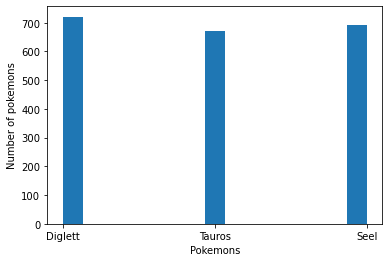

In [ ]:
value=new_data['name'].value_counts()
histogram=new_data['name'].tolist()
plt.hist(histogram,alpha=1,bins=15)
plt.xlabel('Pokemons')
plt.ylabel('Number of pokemons')
value

Is the dataset balanced?

**Your answer:** The dataset is considered to be almost balanced and no more modifications are needed in the number of data sets to be used. 

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

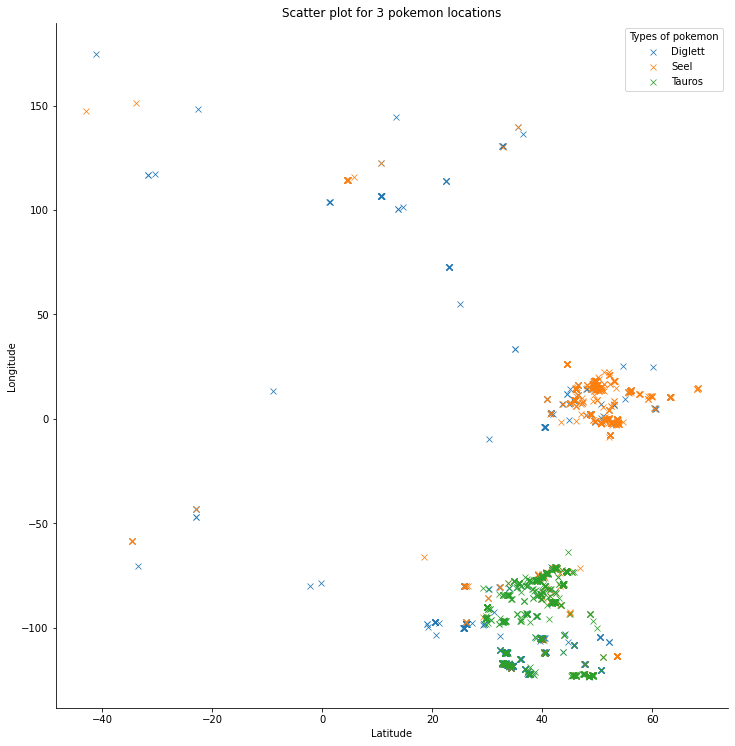

In [ ]:
g=sns.pairplot(x_vars=['latitude'], y_vars=['longitude'], data=new_data, hue="class",height=10,markers='x')
g._legend.remove()
plt.legend(title='Types of pokemon',loc='upper right', labels=['Diglett', 'Seel','Tauros'])
plt.title('Scatter plot for 3 pokemon locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show(g)


Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** There are some alternatives to scatter plots like bar or dot plots, but the scatter plots givs us the best visualization. Maybe, a 2D heat map is also a good solution.

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** The classes Tauros and Seel can be easily be separated because they are distributed equally in different locations. But Diglett is spread everywhere along with tauros and Seel and hence they cannot be easilt separated from the other two.  

Which accuracy do you expect to achieve?

**Your answer:** The accuracy I expect is in the range of 65 to 70 percentage isince the accuracy reduces considerably when taking Diglett into account since the location coordinates of Diglett coincides with the other two pokemons .

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [ ]:
x=new_data[['latitude','longitude']].values

In [ ]:
def encode_species(species):
    if species == 50:
        return 0
    if species == 86:
        return 1
    if species == 128:
        return 2
    else:
        raise ValueError('Species \'{}\' is not recognized.'.format(species))

temp = map(encode_species, new_data['class'].values)
y = np.array(list(temp))

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.20,random_state=42)

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

#converting training numpy arrays into torch
torch_x = torch.tensor(x_train, dtype=torch.float32)
torch_y = torch.tensor(y_train, dtype=torch.int64)
t_dataset = TensorDataset(torch_x, torch_y)
t_data_loader = DataLoader(t_dataset, batch_size=64, shuffle=True)

#converting validation numpy arrays into torch
torch_x_val = torch.tensor(x_val, dtype=torch.float32)
torch_y_val = torch.tensor(y_val, dtype=torch.int64)
t_val_dataset = TensorDataset(torch_x_val, torch_y_val)
t_val_data_loader = DataLoader(t_val_dataset, batch_size=64, shuffle=True)

Train the network.

In [ ]:
class LogisticRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(2, 5)
        self.hidden2 = nn.Linear(5, 4)
        self.output = nn.Linear(4, 3)
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        return x

    
model = LogisticRegressor()
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Reset the model and the optimizer
model = LogisticRegressor()
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(100):
    
    # Compute predictions and back-prop in the training set
    losses = []
    n_correct = 0
    for b_x, b_y in t_data_loader:
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        hard_preds = pred.argmax(dim=1)
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(t_dataset)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in t_val_data_loader:
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(t_val_dataset)
        val_avg_loss = sum(losses)/len(losses)      
        
        
    display_str = 'Epoch {}'
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f}'
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0	Loss: 1.016 	Loss (val): 0.917	Accuracy: 0.47	Accuracy (val): 0.57
Epoch 1	Loss: 0.869 	Loss (val): 0.837	Accuracy: 0.61	Accuracy (val): 0.66
Epoch 2	Loss: 0.833 	Loss (val): 0.808	Accuracy: 0.64	Accuracy (val): 0.64
Epoch 3	Loss: 0.801 	Loss (val): 0.798	Accuracy: 0.64	Accuracy (val): 0.64
Epoch 4	Loss: 0.785 	Loss (val): 0.809	Accuracy: 0.63	Accuracy (val): 0.63
Epoch 5	Loss: 0.786 	Loss (val): 0.812	Accuracy: 0.65	Accuracy (val): 0.64
Epoch 6	Loss: 0.787 	Loss (val): 0.798	Accuracy: 0.64	Accuracy (val): 0.64
Epoch 7	Loss: 0.783 	Loss (val): 0.839	Accuracy: 0.64	Accuracy (val): 0.63
Epoch 8	Loss: 0.797 	Loss (val): 0.814	Accuracy: 0.64	Accuracy (val): 0.63
Epoch 9	Loss: 0.786 	Loss (val): 0.801	Accuracy: 0.64	Accuracy (val): 0.63
Epoch 10	Loss: 0.781 	Loss (val): 0.798	Accuracy: 0.65	Accuracy (val): 0.64
Epoch 11	Loss: 0.775 	Loss (val): 0.789	Accuracy: 0.64	Accuracy (val): 0.63
Epoch 12	Loss: 0.780 	Loss (val): 0.806	Accuracy: 0.64	Accuracy (val): 0.65
Epoch 13	Loss: 0.770 	

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [ ]:
test_samples = torch.tensor(x_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.int64)

preds = model(test_samples).argmax(dim=1)

acc = (preds == test_labels).sum().item()/len(preds)
print("Accuracy: %.2f" % acc)

Accuracy: 0.69


Compute the confusion matrix of your predictions on the test set.

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels, preds)
cm

array([[43, 16, 16],
       [ 5, 41, 16],
       [ 5,  0, 46]], dtype=int64)

<AxesSubplot:>

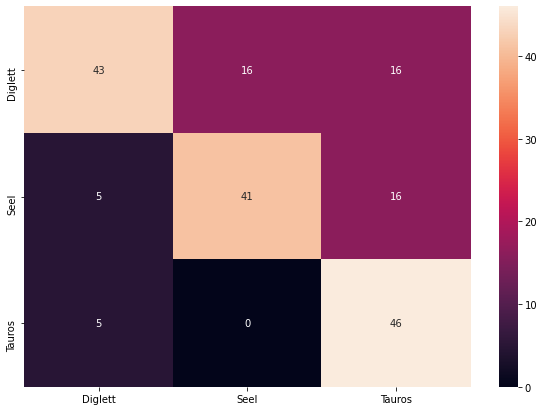

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in pokemons],
                  columns = [i for i in pokemons])
plt.figure(figsize = (10,7))
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
sns.heatmap(df_cm, annot=True)

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** The computed accuracy can be improved by adding some more features as inputs. From the confusion matrix, it is obtained that many digletts are mis-classified as Seel since they are randomly distributed all over the place and so it is difficult to identify them just based on coordinates. 41 seels are classified correctly, but since there are some outliers present in training data, some of the seels are mis-classified as Diglett and Tauros. No tauros is wrongly classified as Seel- since from the scatter plot, it is visible, that tauros almost is completely located far away from seel and there are no outliers too. But some of the digletts and tauros are present in the same location and so they are wrongly classified. 

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

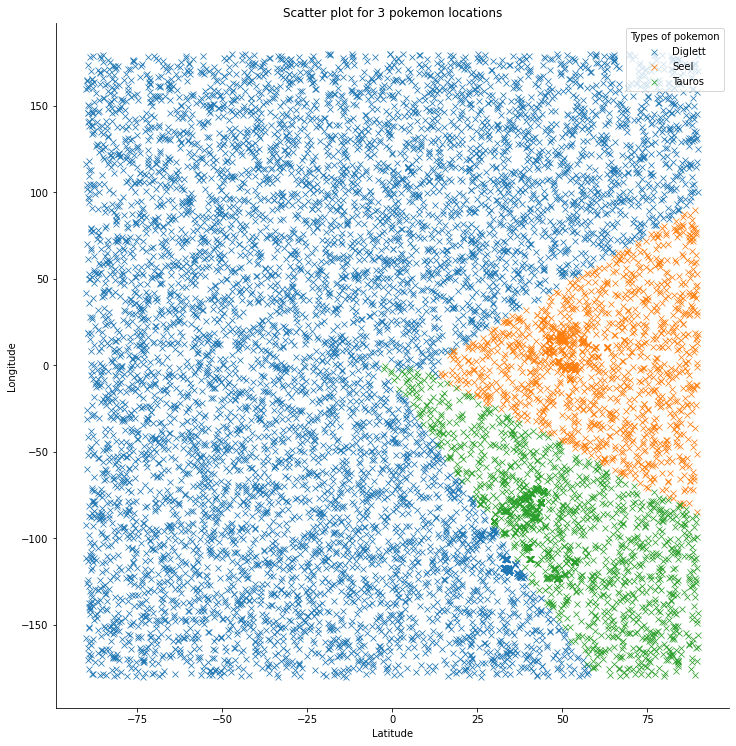

In [ ]:
latitude_rand=np.random.uniform(-90, 90, size=(10000,1))
longitude_rand = np.random.uniform(-180, 180, size=(10000,1))
rand_coord=np.concatenate((latitude_rand,longitude_rand),axis=1)
x_new_train=np.concatenate((x_train,rand_coord))
test_samples = torch.tensor(x_new_train, dtype=torch.float32)
preds = model(test_samples).argmax(dim=1)
preds=preds.numpy()
visualize = pd.DataFrame(data=x_new_train, columns=["latitude", "longitude"])
visualize['class'] = preds.tolist()
g=sns.pairplot(x_vars=['latitude'], y_vars=['longitude'], data=visualize, hue="class",height=10,markers='x')
g._legend.remove()
plt.legend(title='Types of pokemon',loc='upper right', labels=['Diglett', 'Seel','Tauros'])
plt.title('Scatter plot for 3 pokemon locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show(g)

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** (fill in here)

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** First of all, I will decide to capture the rarest of three pokemons. I will get the latitude and longitude positions of the rarest pokemon from my model. I will compare and filter it with my pre-planned travel destinations. If that pokemon is present in any one of my pre-planned travel destinations, I will go there. Otherwise, I will check for the second rarest pokemon and so on. This is how I decide where to go for my vacation.

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** According to my intuition, I beleive that pressure, temperature and population density some of the valid features that might account for the increase in the accuracy. 


To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

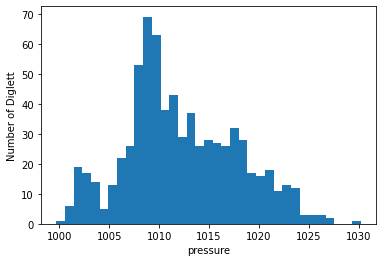

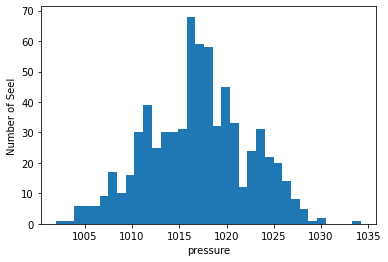

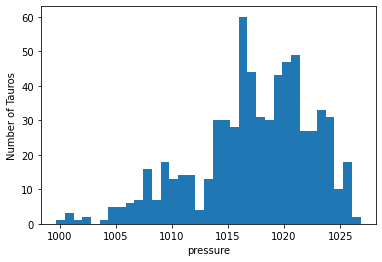

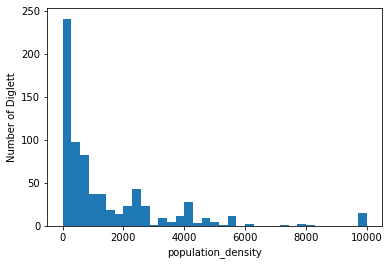

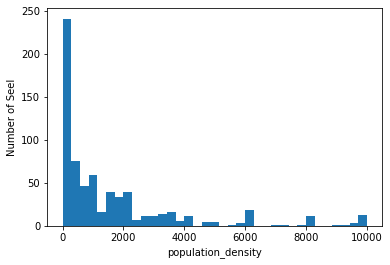

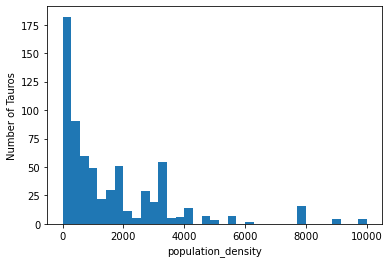

In [ ]:
def plot_histogram(features):
    pokemon_id=[50,86,128]
    for i,j in zip(pokemon_id,pokemons):
        hist_dataset=dataset.loc[dataset["class"] == i]
        histogram=hist_dataset[features].tolist()
        plt.hist(histogram,alpha=1,bins=35)
        plt.xlabel(features)
        plt.ylabel("Number of {}".format(j))
        plt.show()
        
plot_histogram('pressure')
plot_histogram('population_density')

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** I considered two features: Pressure and Population density. Pressure is considerably a good feature when compared to population density because the type of pokemons that are present in a certain value of pressure is unique. For example, as shown in the histograms above, the more number of digletts are found on 1005 Pa pressure, while seels are found mostly on 1017 Pa pressure and Tauros are distributed widely around 1020 Pa pressure. This distribution across different pressure levels gives us a good prediction on where a certain type of pokemons could be. When we consider the population density feature, almost all pokemons are distributed around the population density of 0 to 2000. Since the feature is almost equal for all pokemons, this feature might not be a useful one. 

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** If we use a regression, we can be sure of how certain a particular pokemon can be in a location. But in classification, only the pokemon which contains the maximum probability is chosen at the end. That is regression gives us the probabilities of all the pokemons in an area without neglecting any even if the probability of that pokemon is less. So approaching this as a regression problem makes more sense, because we can get the probability distributions of all pokemons in the given latitude and longitude coordinates. 

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE